In [8]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

from AEW_module import season, AEW, AEW_CCKW
import pickle

In [9]:
# case_in = 'HELENE'
# run_in = 'FOR_KELLY'
# year_in = '2006'
# cut_start = '2006-09-08-12' #The start of the data to be plotted and considered
# cut_end = '2006-09-10-22' #The end of the data to be plotted and considered
# cut_start_early = '2006-09-08-09' #09-14-18 default
# era5_start = '2006-09-01-00' #06-01-00 default

case_in = 'VICTOR'
run_in = 'LATER_RUN'
year_in = '2021'
cut_start = '2021-09-26-00' #The start of the data to be plotted and considered
cut_end = '2021-10-02-00' #The end of the data to be plotted and considered
cut_start_early = '2021-09-25-18' #09-14-18 default
era5_start = '2021-09-01-00' #06-01-00 default

out_name = 'wind_for_tracking'
out_file = '/glade/u/home/qlawton/scratch/mpas_runs/'+case_in+'/'+run_in+'/'+out_name+'.nc'

AEW_data = '/glade/work/qlawton/DATA/AEW/PROCESSED/AEW_tracks_post_loop_'+case_in+'_'+run_in+'.pkl'

In [5]:
merged = xr.open_dataset(out_file)

In [12]:
avg_mer = merged['v'].sel(latitude = slice(5, 20)).mean(dim = 'latitude')
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m-%d')

AEW_season = pickle.load(open(AEW_data, 'rb'))

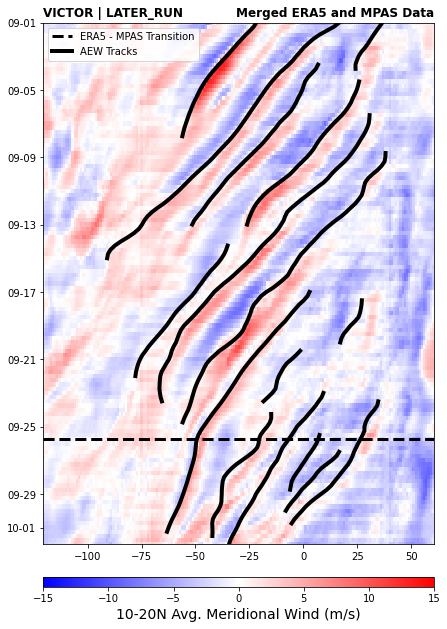

In [13]:
fig = plt.figure(figsize = (7, 12))
ax = fig.add_subplot(111)
vmin = -15
vmax = 15
d1 = ax.pcolormesh(avg_mer.longitude, pd.to_datetime(avg_mer.time.values), avg_mer, vmin = vmin, vmax = vmax, cmap = 'bwr')
ax.set_ylim([era5_start, cut_end])
ax.axhline(y = cut_start_early, color ='k', linewidth = 3, linestyle = '--')
plt.gca().invert_yaxis()
cbar1 = plt.colorbar(d1, orientation = 'horizontal', aspect = 40, pad = 0.05)
cbar1.set_label('10-20N Avg. Meridional Wind (m/s)', fontsize = 14)
ax.yaxis.set_major_formatter(myFmt)
ax.set_title(case_in+' | '+run_in, fontsize = 12, fontweight = 'bold', loc = 'left')
ax.set_title('Merged ERA5 and MPAS Data', fontsize = 12, fontweight = 'bold', loc = 'right')

for wv in range(AEW_season.number_of_waves()):
    wave_in = AEW_season.get_wave(wv)
    #wave_in.smooth_lon
    plt.plot(wave_in.smooth_lon[wave_in.smooth_lat<25], wave_in.time[wave_in.smooth_lat<25], color = 'k', linewidth = 4)
    plt.legend(['ERA5 - MPAS Transition','AEW Tracks'], fontsize = 10)

In [17]:
# test_wave = AEW_season.get_wave(5)
# helene_wave_lon = test_wave.smooth_lon
# helene_wave_lat = test_wave.smooth_lat
# helene_wave_time = test_wave.time
# helene_wave_strength = test_wave.strength

In [18]:
# ds = xr.Dataset(
# ...     data_vars=dict(
# ...         wave_lon=(["time"], helene_wave_lon),
# ...         wave_lat=(["time"], helene_wave_lat),
# ...         wave_strength = (["time"], helene_wave_strength)
# ...     ),
# ...     coords=dict(
# ...         time=helene_wave_time),
# ...     attrs=dict(description="Helene Wave Data"))

In [22]:
# ds.to_netcdf('helene_mpas_wave_track.nc')

In [23]:
# ds

<xarray.Dataset>
Dimensions:        (time: 35)
Coordinates:
  * time           (time) datetime64[ns] 2006-09-05T06:00:00 ... 2006-09-13T1...
Data variables:
    wave_lon       (time) float64 22.86 22.34 21.56 ... -27.02 -28.52 -29.59
    wave_lat       (time) float64 13.43 12.88 12.42 12.24 ... 14.16 14.46 14.7
    wave_strength  (time) float64 4.096e-06 1.651e-06 ... 1.857e-05 2.036e-05
Attributes:
    description:  Helene Wave Data